In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from pprint import pprint

In [375]:
seed =10
N = 1000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 7
dt = 0.1
t = np.arange(0,10000,dt)
K = 5
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= np.random.uniform(-1,1,N),p_omega=omega)
# new_theta = to_ppi(theta)
# dtheta_c = np.cumsum(dtheta,axis=0)
# sum_time = 200
# avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
# plt.plot(np.sort(avg_dtheta[-1]))
# plt.plot((avg_dtheta[-1]))

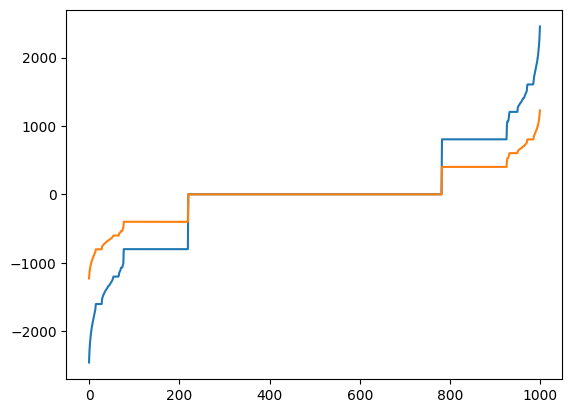

In [387]:
ARG = (theta[-1]-theta[-len(t)//4])//np.pi
plt.plot(ARG)
ARG = (theta[-1]-theta[-len(t)//8])//np.pi
plt.plot(ARG)


In [392]:
ARG = (theta[-1]-theta[-len(t)//8])//np.pi
ARG =  np.where(ARG<0,ARG,ARG+1)
u,c = np.unique(ARG,return_counts=True)

I_c_o1 =np.where(c>1)
u_o1 = u[I_c_o1]
c_o1 = c[I_c_o1]
u_c = np.argsort(c_o1)[::-1]
UU = u_o1[u_c]
R_M = UU[0]
R_WR = UU - R_M
RU = np.abs(R_WR)
G_L = []
for G in set(RU):
    print(G)


0.0
803.0
804.0
401.0
402.0
403.0
537.0
602.0
603.0
702.0


54.0
-1.0
1.0
3.0
5.0


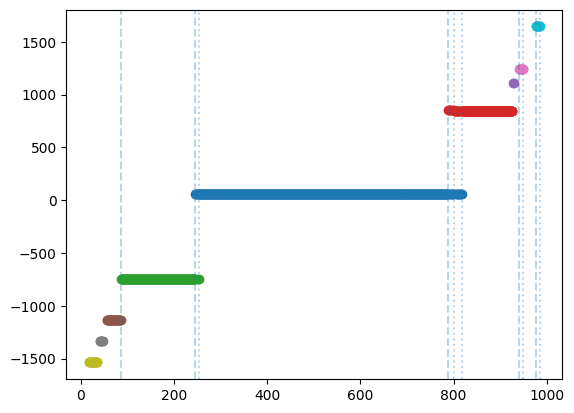

In [355]:
ARG = (theta[-1]-theta[-len(t)//4])//np.pi
ARG =  np.where(ARG<0,ARG,ARG+1)
u,c = np.unique(ARG,return_counts=True)

I_c_o1 =np.where(c>1)
u_o1 = u[I_c_o1]
c_o1 = c[I_c_o1]
u_c = np.argsort(c_o1) 
UU = u_o1[u_c][::-1]
R_M = UU[0]
R_WR = UU - R_M
np.abs(R_WR) 
R_WR_C = np.argsort(np.abs(R_WR))
R_MM,R_old = 0,0
G_num = 0
G = {}
print(R_WR[R_WR_C][0]+R_M)
I, = np.where(ARG == R_WR[R_WR_C][0]+R_M)
G[0,'I'] = I
G[0,'R'] = R_M
plt.scatter(G[0,'I'],ARG[G[0,'I']])
plt.axvline(max(I),ls=':',alpha=0.3)
plt.axvline(min(I),ls='--',alpha=0.3)
keys = [0]
Rs = []

for R in R_WR[R_WR_C][1:]:
    if abs(abs(R) - abs(R_MM))<10:
        I, = np.where(ARG == R+R_M)
        G[0,'I'] = np.r_[G[0,'I'],I]
        plt.scatter(G[0,'I'],ARG[G[0,'I']])
    else:
        if abs(abs(R)-abs(R_old))<10:
            Gs = np.sign(R)*G_num
            I, = np.where(ARG == R+R_M)
            if Gs in keys:
                G[Gs,'I'] = np.r_[G[Gs,'I'],I]
            else:
                G[Gs,'I'] =  I
            G[Gs,'R'] = R_M + R
            keys.append(Gs)
            print(Gs)
            plt.scatter(G[Gs,'I'],ARG[G[Gs,'I']])
            plt.axvline(max(I),ls=':',alpha=0.3)
            plt.axvline(min(I),ls='--',alpha=0.3)
            R_old = R
        else:
            G_num += 1
            I, = np.where(ARG == R+R_M)
            Gs = np.sign(R)*G_num
            keys.append(Gs)
            G[Gs,'I'] = I
            G[Gs,'R'] = R_M + R
            # print(Gs)
            plt.scatter(G[Gs,'I'],ARG[G[Gs,'I']])

    R_old = R
    # print(I)
    # plt.scatter(I,ARG[I])


In [361]:
keys

[0, 1.0, -1.0, 1.0, 2.0, -3.0, 3.0, -4.0, -5.0, 5.0]

In [350]:
def get_TM(x,step):
    x_c = np.cumsum(x,axis=0)
    if x.ndim == 2:
        x_m = (x_c[step:,:] - x_c[:-step,:])/step
    else:
        x_m = (x_c[step:] - x_c[:-step])/step
    return x_m

In [356]:
STEP =  100
ET = get_TM(theta,STEP)

In [360]:
r0 = np.sum(np.exp(1j*ET[:,G[0,'I']]),axis=1)/ N
r1m = np.sum(np.exp(1j*ET[:,G[-1,'I']]),axis=1)/ N
r1p = np.sum(np.exp(1j*ET[:,G[1,'I']]),axis=1)/ N
r2m = np.mean(np.exp(1j*theta[:,G[-2,'I']]),axis=1)
r2p = np.mean(np.exp(1j*theta[:,G[2,'I']]),axis=1)

KeyError: (-2, 'I')

In [ ]:
tm = get_TM(t,STEP)
# r0m = get_TM(r0,10)

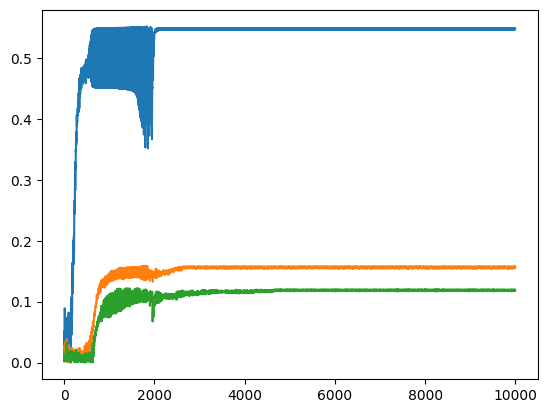

In [359]:
plt.plot(tm,abs(r0))
plt.plot(tm,abs(r1m))
plt.plot(tm,abs(r1p))

plt.plot(tm,abs(r2m))
plt.plot(tm,abs(r2p))

In [ ]:
rc0 = np.cumsum(r0)
rm0 = rc0 

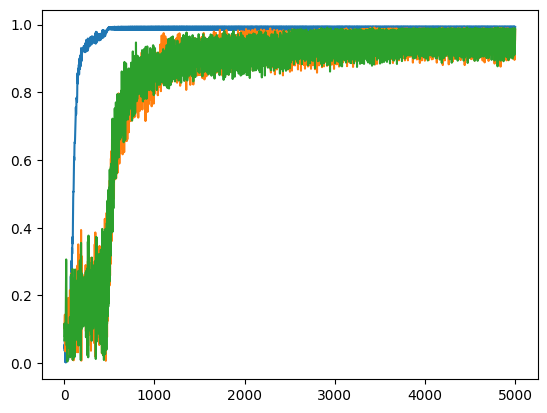

In [231]:
plt.plot(t,np.abs(r0))
plt.plot(t,np.abs(r1m))
plt.plot(t,np.abs(r1p))



In [181]:
ARG = (theta[-1]-theta[-len(t)//4])//np.pi
u,c = np.unique(ARG,return_counts=True)


u_c = np.argsort(c) 
UU = u[u_c][::-1]


UU



G_M = UU[0]
G_2M,G_2P = np.sort([UU[1],UU[2]])
G_3M,G_3P = np.sort([UU[3],UU[4]])


GI_M = np.where(ARG == G_M)
GI_2M = np.where(ARG == G_2M)
GI_2P = np.where(ARG == G_2P)

GI_3M = np.where(ARG == G_3M)
GI_3P = np.where(ARG == G_3P)

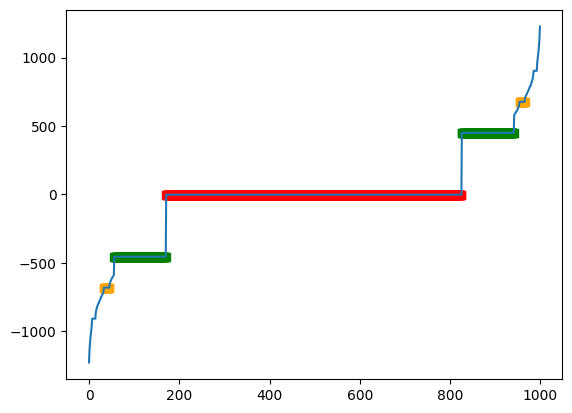

In [182]:
plt.plot(ARG)
plt.scatter(GI_M,ARG[GI_M],color='red',marker= 's')
plt.scatter(GI_2M,ARG[GI_2M],color='green',marker= 's')
plt.scatter(GI_2P,ARG[GI_2P],color='green',marker= 's')

plt.scatter(GI_3M,ARG[GI_3M],color='orange',marker= 's')
plt.scatter(GI_3P,ARG[GI_3P],color='orange',marker= 's')

In [154]:
u_c = np.argsort(c) 
UU = u[u_c][::-1]
UU


array([  -37.,   384.,  -457.,   594.,   804.,  -667.,   699.,  -878.,
        -614.,   -36.,  -722.,  -731.,  -735.,  -772.,  -742.,  -719.,
        -750.,  -758.,  -711.,  -705.,  -699.,  -688.,  -766.,  1225.,
        -773.,  -932., -1144., -1092., -1054., -1023.,  -996.,  -975.,
        -953.,  -906.,  -669.,  -877.,  -843.,  -826.,  -819.,  -808.,
        -798.,  -791.,  -781.,  -619.,  -640.,   697.,  1091.,  1053.,
        1022.,   996.,   974.,   954.,   935.,   918.,   905.,   887.,
         868.,   732.,   722.,   710.,   675.,  -634.,   673.,   666.,
         657.,   647.,   642.,  -468.,  -516.,  -571.,  -581.,  -590.,
        -598.,  -607.,  1144.,  -625., -1229.])

In [76]:
u[arg_c] - u[arg_c[-1]]


array([-9.540e+02, -4.700e+02,  9.440e+02, -4.570e+02, -4.470e+02,
       -4.440e+02, -4.360e+02, -4.280e+02, -3.760e+02,  5.420e+02,
        5.470e+02,  5.560e+02,  5.630e+02,  5.680e+02, -4.780e+02,
        5.690e+02,  6.050e+02,  6.140e+02,  7.230e+02,  7.380e+02,
        7.520e+02,  7.630e+02,  7.770e+02,  7.920e+02,  8.080e+02,
        8.260e+02,  8.460e+02,  8.710e+02,  9.020e+02,  5.940e+02,
       -4.830e+02, -4.660e+02, -5.220e+02, -6.100e+02, -6.180e+02,
       -6.250e+02, -6.320e+02, -6.460e+02, -6.960e+02, -6.030e+02,
       -7.170e+02, -7.510e+02, -7.680e+02, -7.890e+02, -8.140e+02,
       -8.440e+02, -8.860e+02, -7.340e+02, -5.830e+02, -5.960e+02,
        1.009e+03, -5.300e+02, -5.350e+02, -5.400e+02, -5.470e+02,
       -5.480e+02, -5.560e+02, -5.590e+02, -5.700e+02, -5.770e+02,
       -5.650e+02, -4.630e+02, -5.890e+02, -1.000e+00, -6.730e+02,
        5.880e+02, -5.050e+02,  6.720e+02,  5.040e+02, -3.370e+02,
        3.360e+02,  0.000e+00])

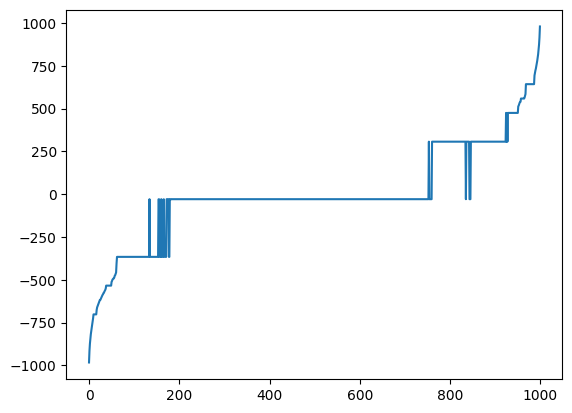

In [63]:
plt.plot((theta[-1]-theta[-10000])//np.pi)
# plt.plot((theta[-1]-theta[-20000])//np.pi)
# plt.plot((theta[-1]-theta[0])//np.pi)
# plt.plot((theta[-1]-theta[-1000])//np.pi)
# plt.plot((theta[-1]-theta[-100])//np.pi)
# plt.plot((theta[-1]-theta[-10])//np.pi)
# plt.plot((theta[-1]-theta[-1])//np.pi)

In [26]:
rs = np.mean(np.exp(1j*theta),axis=1)
rvs = np.mean(np.exp(1j*dtheta),axis=1)

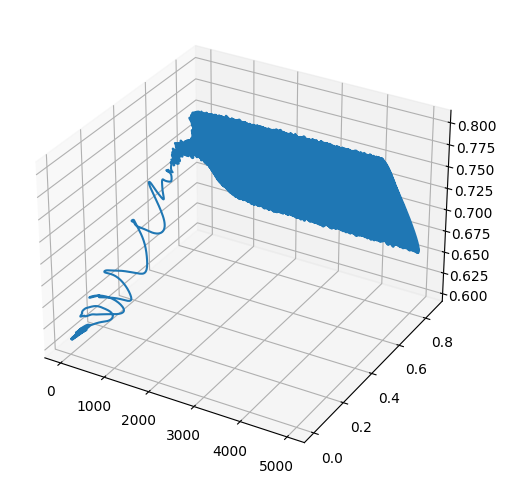

In [33]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(t,abs(rs),abs(rvs))
# plt.plot(abs(rs),abs(rvs))


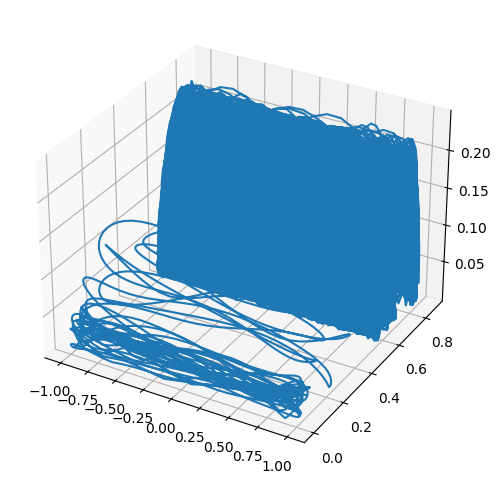

In [39]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(np.cos(t)[1:],np.abs(rs)[1:],abs(np.diff(rs)/dt))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


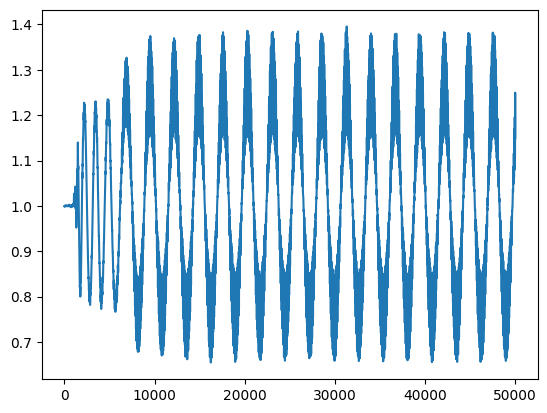

In [40]:
plt.plot(np.cos(rs))

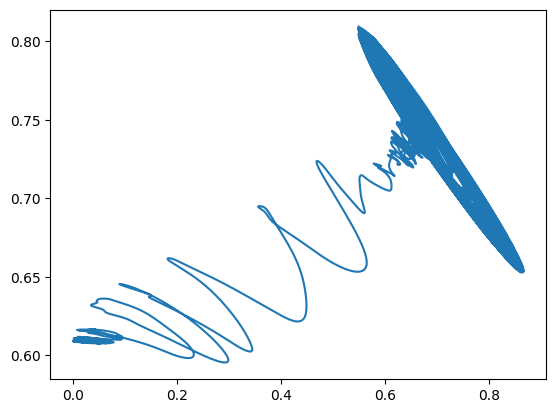

In [30]:
plt.plot(abs(rs),abs(rvs))

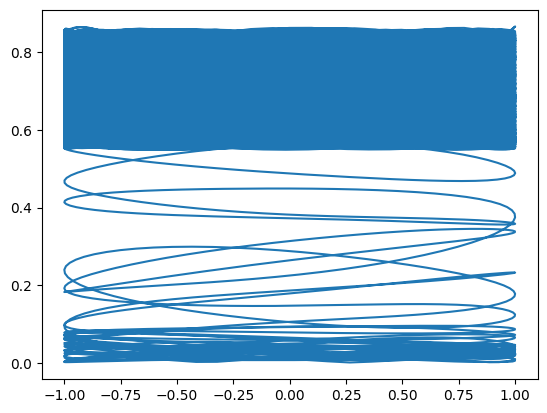

In [28]:
plt.plot(np.cos(t),abs(rs))


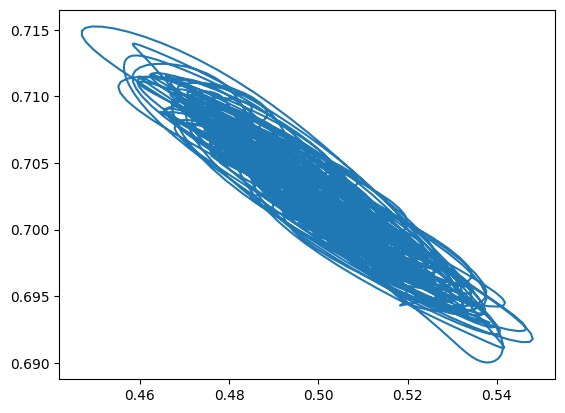

In [20]:
plt.plot(abs(rs)[-5000:],abs(rvs)[-5000:])

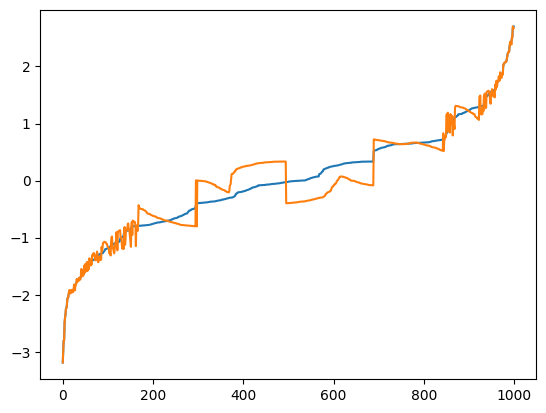

In [46]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 8
dt = 0.01
t = np.arange(0,1000,dt)
K = 3.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta[-1],p_dtheta= dtheta[-1],p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 2000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
plt.plot(np.sort(avg_dtheta[-1]))
plt.plot((avg_dtheta[-1]))

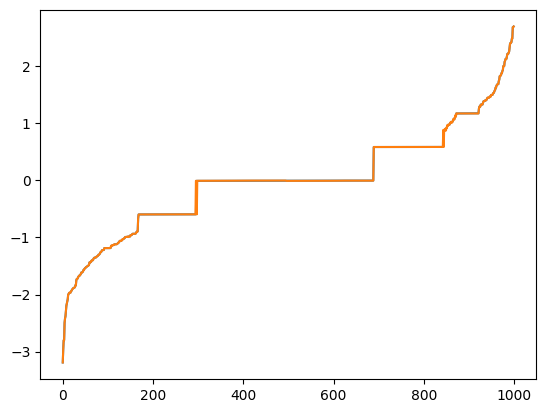

In [53]:
sum_time = 20000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
plt.plot(np.sort(avg_dtheta[-1]))
plt.plot((avg_dtheta[-1]))

In [48]:
Z = np.sum(np.exp(1j*theta),axis=1)/N

In [49]:
signal = Z[-5000:]

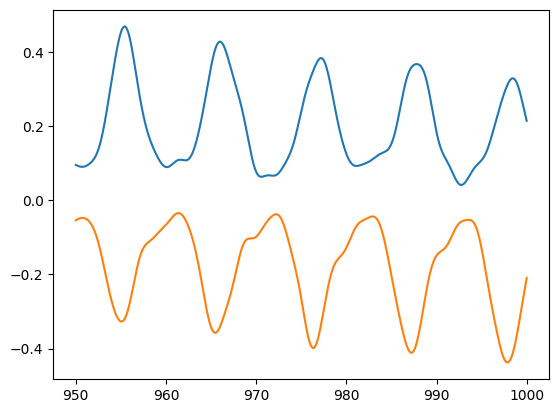

In [50]:
Fs = 5000
T = 1/dt

# time = np.linspace(0, , Fs)
time = t[-Fs:]
plt.plot(time, signal.real)
plt.plot(time, signal.imag)
plt.show()

In [72]:
peak = [np.abs(i) for i in yf]
peak_index = np.argsort(peak)

In [81]:
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, dt)
amplitude = abs(yf)*(2/len(yf))
amplitude_index = np.argsort(amplitude)[::-1]

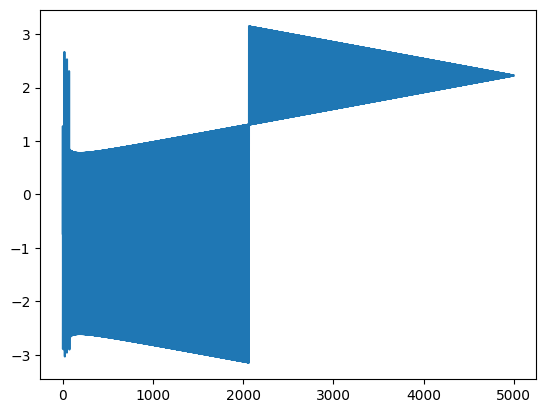

In [85]:
plt.plot(np.angle(yf)[amplitude_index])

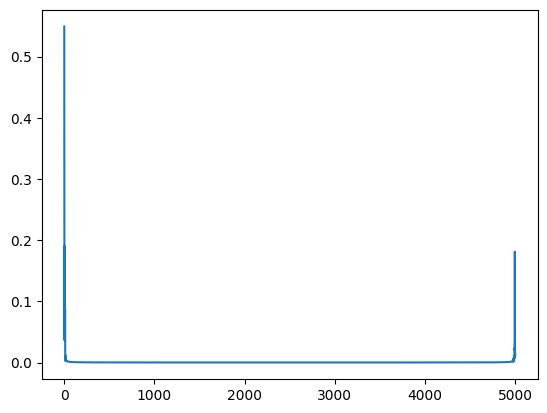

In [83]:
def Ifft_to_function(signal):
    yf = np.fft.fft(signal)
    yf = np.fft.fftshift(yf)
    xf = np.fft.fftfreq(N, dt)
    xf = np.fft.fftshift(xf)

    amplitude = abs(yf)*(2/len(yf))
    amplitude_index = np.argsort(amplitude)[::-1]
    for 

(-1.5, 1.5)

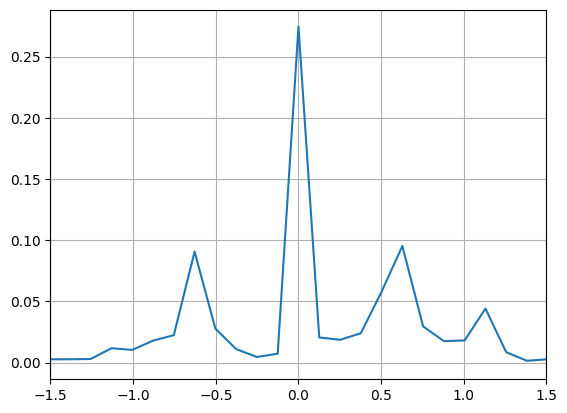

In [52]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
# number of signal points
N = 5000
# sample spacing
T = dt
x = np.linspace(0.0, N*T, N, endpoint=False)
y = signal
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf*2*np.pi, 1.0/N * np.abs(yplot))
plt.grid()
plt.xlim(-1.5,1.5)

In [69]:
yf

array([1023.66032863-914.93382811j,   52.81518302 -87.72927934j,
         13.72826218 -91.64742596j, ...,   54.37949726  +6.44252627j,
        -16.552374   +15.36623147j,  -31.8989094  +16.45853406j])

In [64]:
y = np.fft.ifft(yf)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


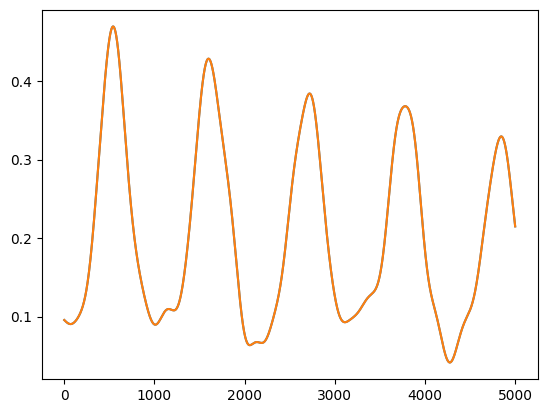

In [68]:
plt.plot(y)
plt.plot(signal.real)

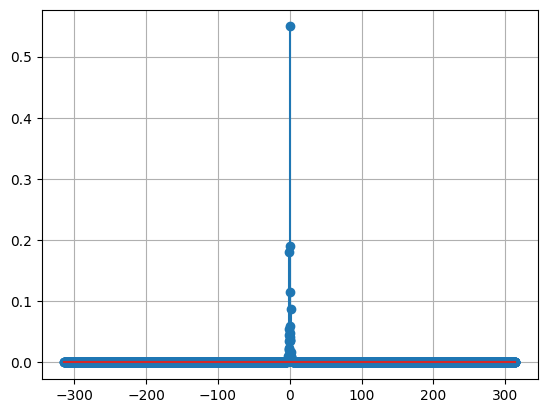

In [63]:
s_fft = np.fft.fft(signal) # 추후 IFFT를 위해 abs를 취하지 않은 값을 저장한다.
amplitude = abs(s_fft)*(2/len(s_fft)) # 2/len(s)을 곱해줘서 원래의 amp를 구한다.
frequency = np.fft.fftfreq(len(s_fft), dt)

# plt.xlim(0, 0.8)
plt.stem(frequency*(2*np.pi), amplitude)
plt.grid(True)
plt.show()

In [29]:
fft_freq = frequency.copy()
peak_index = amplitude[:int(len(amplitude)/2)].argsort()[-1]
peak_freq = fft_freq[peak_index]

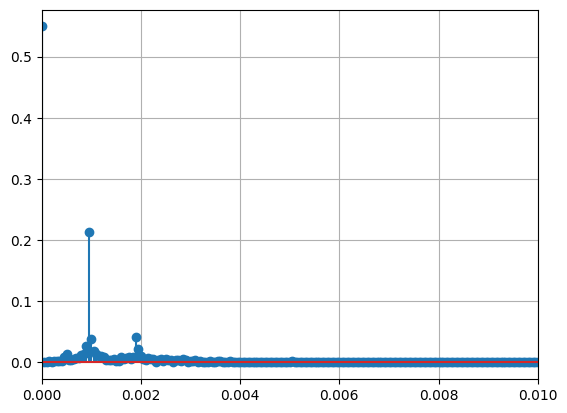

In [30]:
s_fft = np.fft.fft(signal) # 추후 IFFT를 위해 abs를 취하지 않은 값을 저장한다.
amplitude = abs(s_fft)*(2/len(s_fft)) # 2/len(s)을 곱해줘서 원래의 amp를 구한다.
frequency = np.fft.fftfreq(len(s_fft), T)

plt.xlim(0, 0.01)
plt.stem(frequency, amplitude)
plt.grid(True)
plt.show()

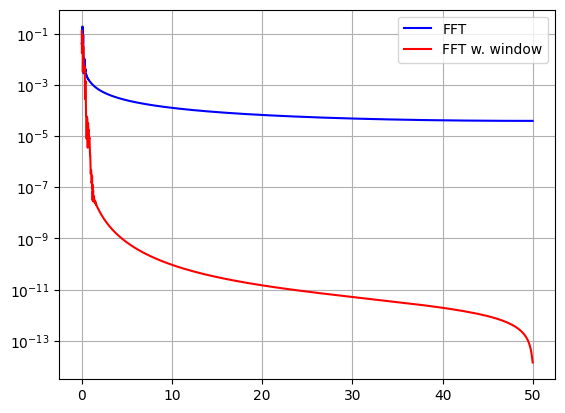

In [62]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 5000
# sample spacing
T = dt
x = np.linspace(0.0, N*T, N, endpoint=False)
y = signal
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
# plt.xlim(0,0.1)
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

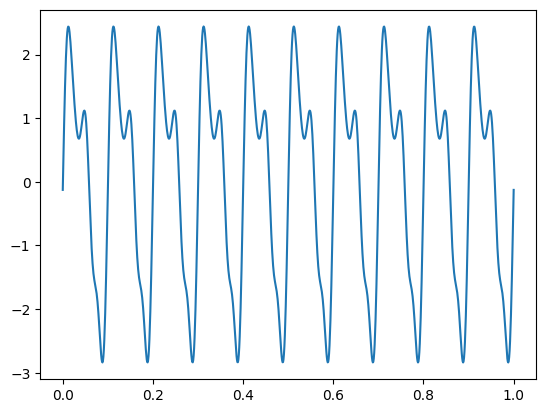

In [111]:
Fs = 1000
T = 1/Fs
end_time = 1
time = np.linspace(0, end_time, Fs)
amp = [2, 1, 0.5, 0.2]
freq = [10, 20, 30, 40]
phase = np.deg2rad([-10, 20, -30, 40])

signal_1 = amp[0]*np.sin(freq[0]*2*np.pi*time+phase[0])
signal_2 = amp[1]*np.sin(freq[1]*2*np.pi*time+phase[1])
signal_3 = amp[2]*np.sin(freq[2]*2*np.pi*time+phase[2])
signal_4 = amp[3]*np.sin(freq[3]*2*np.pi*time+phase[3])

signal = signal_1 + signal_2 + signal_3 + signal_4

plt.plot(time, signal)
plt.show()

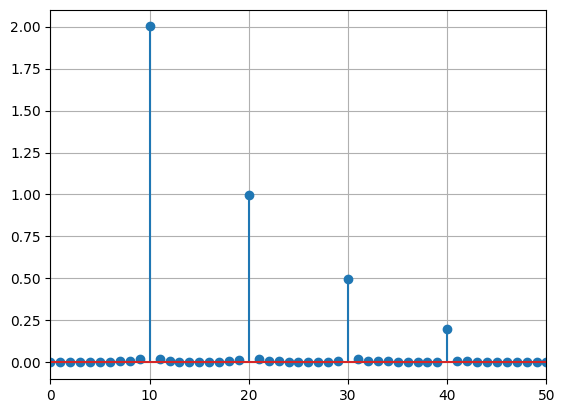

In [112]:
s_fft = np.fft.fft(signal) # 추후 IFFT를 위해 abs를 취하지 않은 값을 저장한다.
amplitude = abs(s_fft)*(2/len(s_fft)) # 2/len(s)을 곱해줘서 원래의 amp를 구한다.
frequency = np.fft.fftfreq(len(s_fft), T)

plt.xlim(0, 50)
plt.stem(frequency, amplitude)
plt.grid(True)
plt.show()


In [113]:
idx = np.argsort(amplitude)[::-1]

In [ ]:
y = fft(x);
z = fftshift(y);

In [114]:
angle = np.angle(s_fft)
angle[amplitude<0] = 0

In [116]:
print(np.rad2deg(angle[idx][:8]))

[  98.18399939  -98.18399939   66.3715705   -66.3715705  -114.79866304
  114.79866304  -41.95703954   41.95703954]
